In [25]:
import networkx as nx
import matplotlib.pyplot as plt


from functions import *
from noisy_graphs import *
from sample_graphs import *
from frank_wolfe import *
from grampa import *
from eigenalign import *

In [26]:
#G = nx.read_edgelist('./graphs/collaboration_astrophysics')
#A = nx.adjacency_matrix(G).todense()
#print("Number of nodes:", G.number_of_nodes())
#print("Number of edges:", G.number_of_edges())

In [27]:
#Gprime = nx.Graph.copy(G)
#B = nx.adjacency_matrix(Gprime)

# now run your algorithm on (G, Gprime) or on (A, B) !
#print("Number of nodes:", G.number_of_nodes())
#print("Number of edges:", G.number_of_edges())

In [28]:
# G and Gprime are too big (in memory) for computation
# new dataset

n = (30)
p = 0.4

A_eq, b_eq =  bistochastic_equality_constraints(n)

G0, A0 = sample_Erdos_Renyi(n, p)
G1, A1 = G0, A0

Ps = rand_perm_matrix(n)


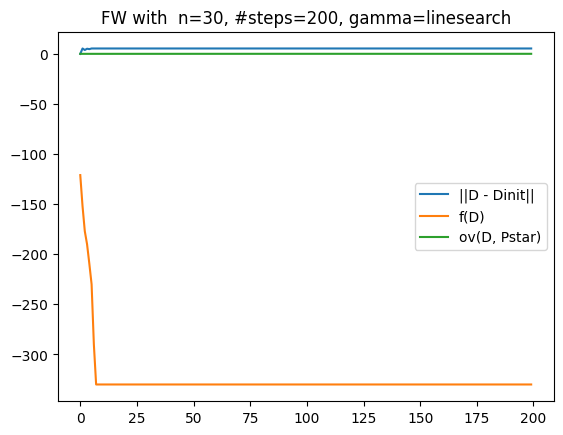

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

In [29]:
#Frank_wolfe algorithm

D = frank_wolfe(A0, A1, 200, Pstar=Ps , method="minustrace",plot=True)
print(D)
# minustrace more efficient than mindiff ??

0.0


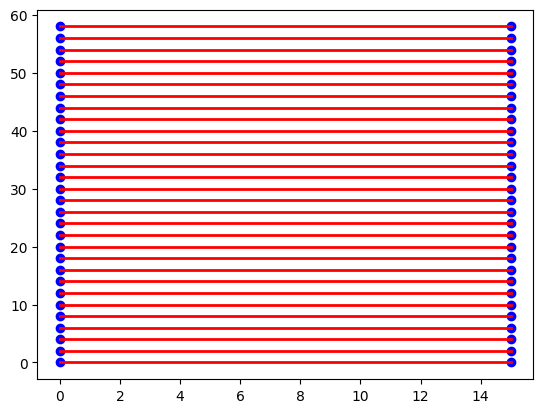

In [30]:
Dp = project_to_perm(D, A_eq, b_eq)

# we want to see how Dp appair these two graphs
plot_alignment(G0, G1, D)
print(np.linalg.norm(A0.toarray() - D @ A1.toarray() @ D.T))

0.0


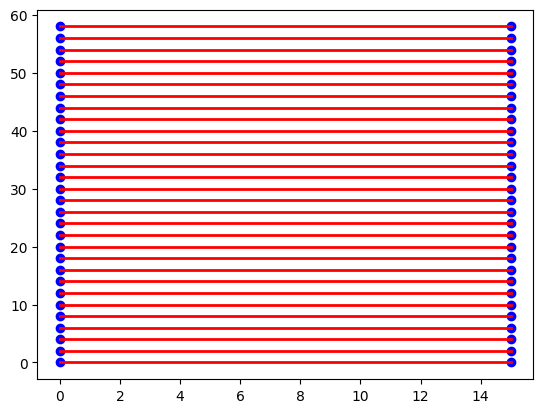

In [42]:
plot_alignment(G0,G1, Dp)
print(np.linalg.norm(A0.toarray() - Dp @ A1.toarray() @ Dp.T))

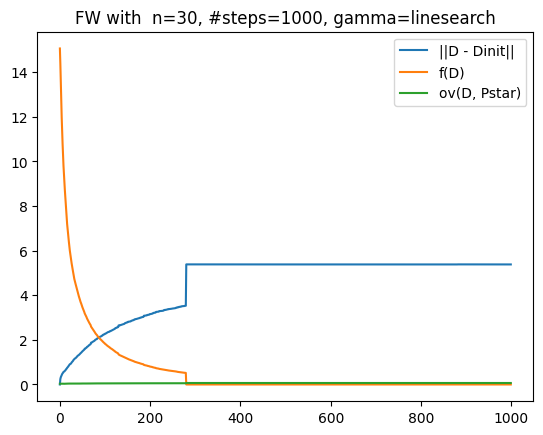

In [40]:
D1 = frank_wolfe(A0, A1, 1000, Pstar=Ps , method="mindiff",plot=True)


0.012806019674864217


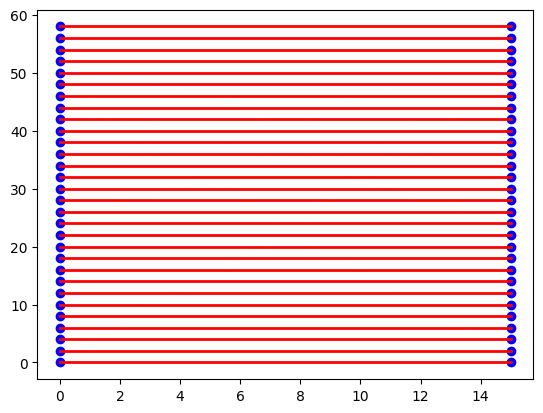

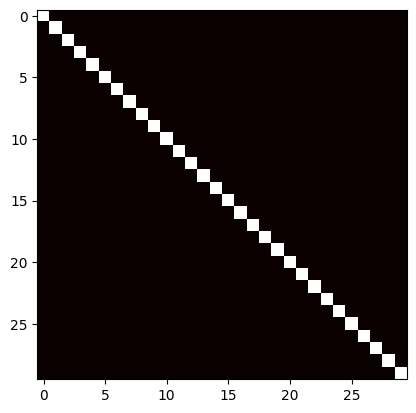

In [43]:
D1p = project_to_perm(D1, A_eq, b_eq)

# we want to see how Dp appair these two graphs
plot_alignment(G0, G1, D1)
print(np.linalg.norm(A0.toarray() - D1 @ A1.toarray() @ D1.T))
plt.show()
matrix_heatmap(D1)

0.0


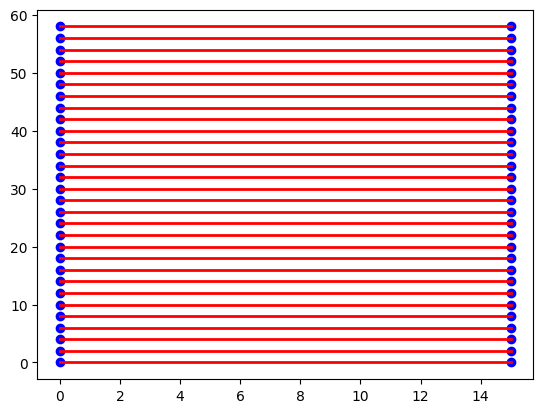

In [44]:
plot_alignment(G0, G1, D1p)
print(np.linalg.norm(A0.toarray() - D1p @ A1.toarray() @ D1p.T))

19.493588689617926


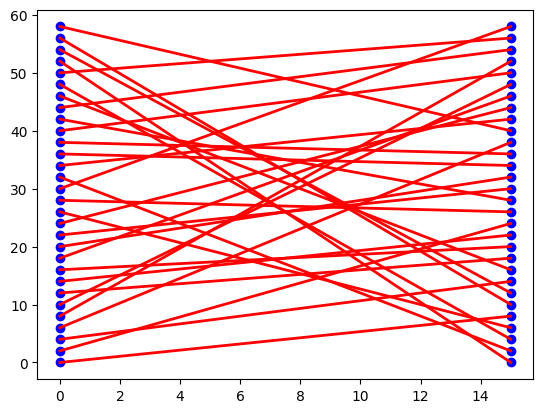

In [46]:
#GRAMPA ?

eta = 0.1
D2 = grampa(A0.toarray(), A1.toarray(), eta)
plot_alignment(G0, G1, D2)
print(np.linalg.norm(A0.toarray() - D2 @ A1.toarray() @ D2.T))

In [47]:
EigP = eigenalign(G0, G1, 1, 0.5, 0.01)

20.591260281974
0.06666666666666667


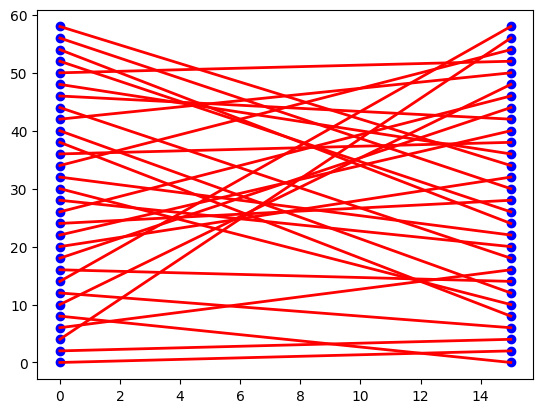

In [49]:
plot_alignment(G0, G1, EigP)
print(np.linalg.norm(A0.toarray() - EigP @ A1.toarray() @ EigP.T))
print(overlap(EigP, D2))


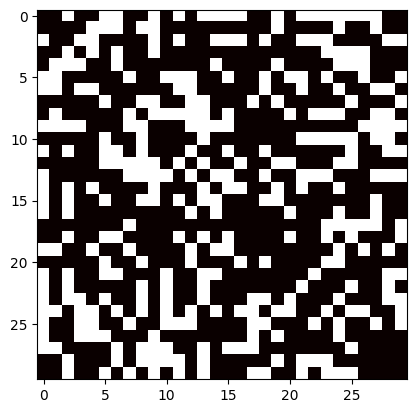

In [38]:
matrix_heatmap(A0.toarray())